Data Visualization

Descriptive Statistics for RMS columns:
             Poly  RMS_0.4861  RMS_0.5876  RMS_0.6563
count  896.000000  885.000000  886.000000  885.000000
mean     1.477612    1.812373    1.076388    1.159080
std      7.503620    9.026810    6.939461    6.264201
min      0.002321    0.002408    0.000068    0.001635
25%      0.146813    0.138938    0.042029    0.113600
50%      0.450181    0.479590    0.192897    0.349845
75%      1.092887    1.428810    0.769885    0.860253
max    195.786570  226.790070  188.284370  167.667540
Log-scaled distributions plotted and saved to rms_log_distribution.png


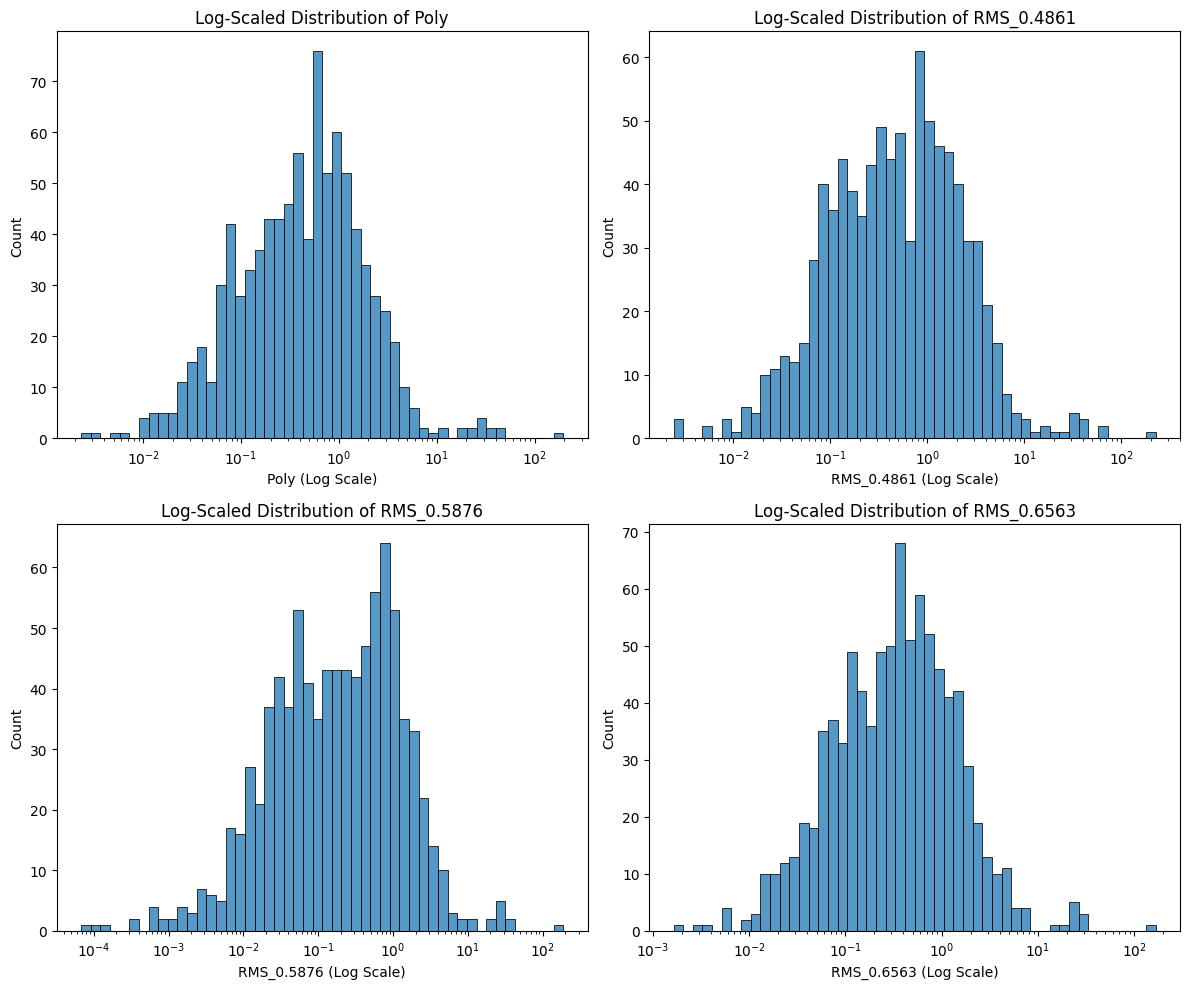

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the summary file
summary_df = pd.read_csv("file_lens_summary.csv")

# 1. Statistics to prove variation
rms_cols = ['Poly', 'RMS_0.4861', 'RMS_0.5876', 'RMS_0.6563']
print("Descriptive Statistics for RMS columns:")
print(summary_df[rms_cols].describe())

# 2. Improved Plotting
# We will plot the RMS columns on a Logarithmic X-axis to show the distribution detail
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(rms_cols):
    # Log transform the data for plotting (adding a small epsilon to avoid log(0) if any)
    data = summary_df[col].dropna()
    # Filter out absolute zeros if any for log plot, or just use log1p
    # actually, RMS should be > 0 usually.
    
    # We'll use a log scale on the x-axis directly
    sns.histplot(data, ax=axes[i], bins=50, log_scale=True) 
    axes[i].set_title(f'Log-Scaled Distribution of {col}')
    axes[i].set_xlabel(f'{col} (Log Scale)')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.savefig('rms_log_distribution.png')
print("Log-scaled distributions plotted and saved to rms_log_distribution.png")

Loading RMSvField.csv...
Initial rows loaded: 14336
Rows after cleaning non-numeric data: 14336
Found 896 unique lenses based on 'Field == 0'.


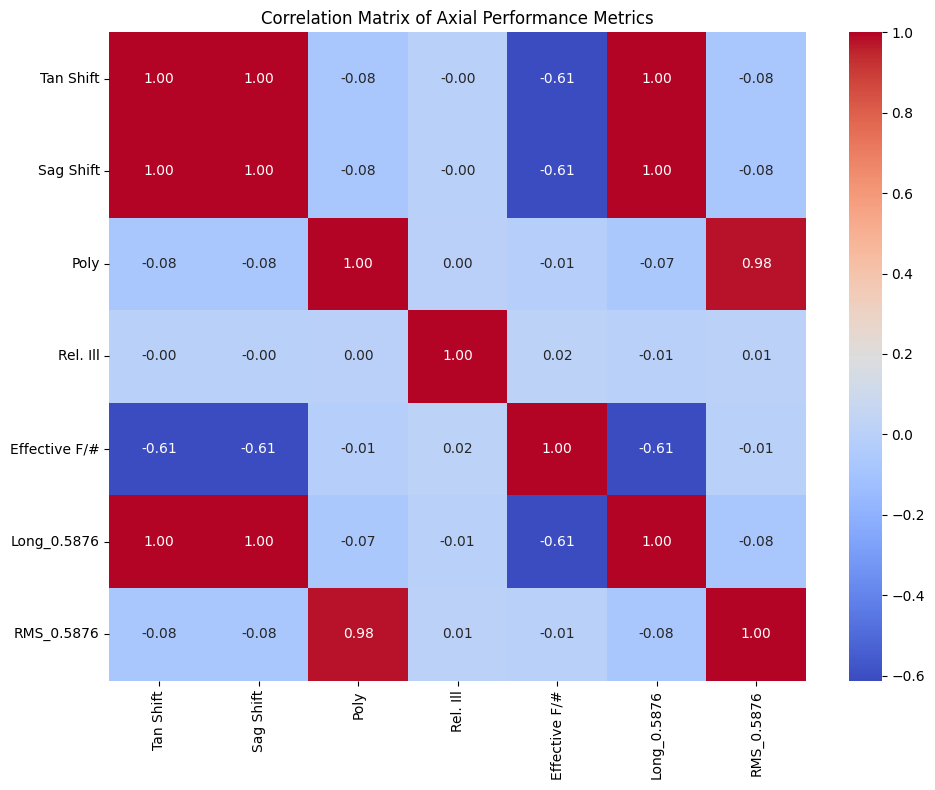

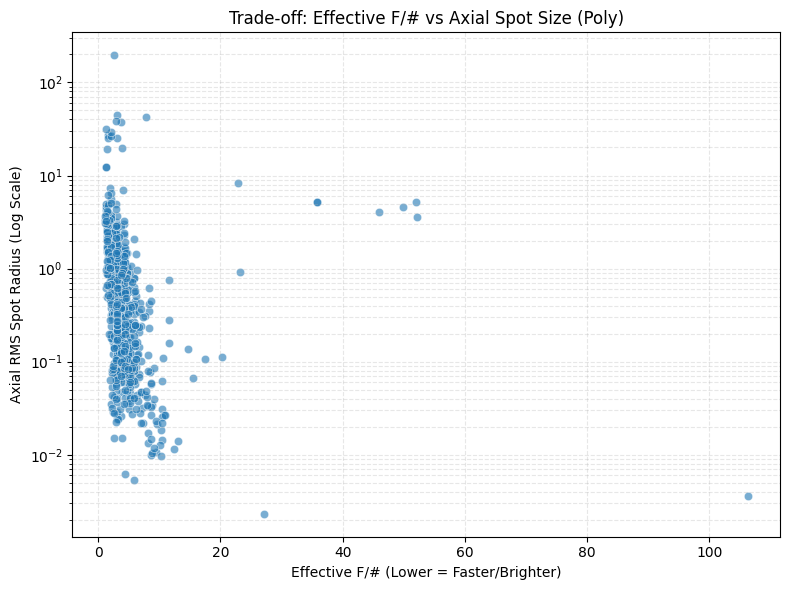

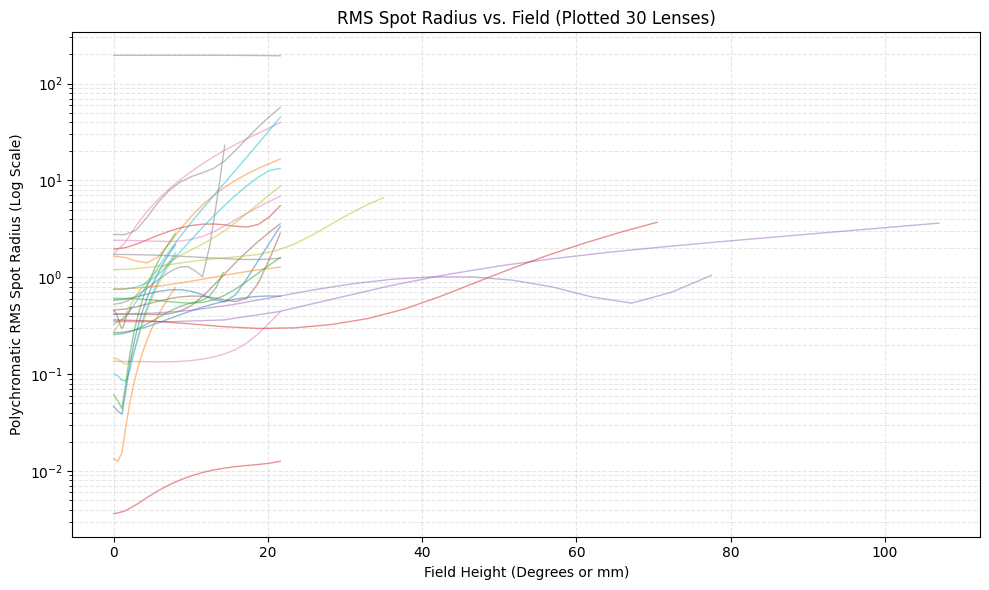

Visualizations generated.


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Load Summary Data
summary_df = pd.read_csv("file_lens_summary.csv")

# 2. Load RMSvField Data (Cleaner than Longitudinal)
# Use 'error_bad_lines' or 'on_bad_lines' depending on pandas version
try:
    rms_df = pd.read_csv("RMSvField.csv", on_bad_lines='skip')
except TypeError:
    rms_df = pd.read_csv("RMSvField.csv", error_bad_lines=False)

# Clean RMS data: Ensure numeric
cols = ['Field', 'Poly', '0.4861', '0.5876', '0.6563']
for c in cols:
    rms_df[c] = pd.to_numeric(rms_df[c], errors='coerce')
rms_df = rms_df.dropna()

# -------------------------------------------------------
# Visualization 1: Correlation Heatmap
# -------------------------------------------------------
plt.figure(figsize=(10, 8))
# Select only relevant numeric columns
corr_cols = ['Tan Shift', 'Sag Shift', 'Poly', 'Rel. Ill', 'Effective F/#', 
             'Long_0.5876', 'RMS_0.5876']
corr_matrix = summary_df[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Axial Performance Metrics")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")

# -------------------------------------------------------
# Visualization 2: F/# vs Spot Size (The "Trade-off" Plot)
# -------------------------------------------------------
plt.figure(figsize=(8, 6))
# Log scale for Poly because of the outliers we saw
sns.scatterplot(data=summary_df, x='Effective F/#', y='Poly', alpha=0.6)
plt.yscale('log')
plt.title("Trade-off: Effective F/# vs Axial Spot Size (Poly)")
plt.xlabel("Effective F/# (Lower = Faster/Brighter)")
plt.ylabel("Axial RMS Spot Radius (Log Scale)")
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.tight_layout()
plt.savefig("fnum_vs_rms.png")

# -------------------------------------------------------
# Visualization 3: "Spaghetti Plot" of RMS vs Field Curves
# -------------------------------------------------------
# Logic: A new lens starts when 'Field' drops back to 0 (or is close to 0)
# We will identify these indices
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------
# 1. LOAD DATA (Robust Method)
# ---------------------------------------------------------
print("Loading RMSvField.csv...")
try:
    # 'on_bad_lines' works for newer pandas, 'error_bad_lines' for older
    rms_df = pd.read_csv("RMSvField.csv", on_bad_lines='skip')
except TypeError:
    rms_df = pd.read_csv("RMSvField.csv", error_bad_lines=False)

print(f"Initial rows loaded: {len(rms_df)}")

# ---------------------------------------------------------
# 2. CLEAN DATA (Force Numbers)
# ---------------------------------------------------------
cols = ['Field', 'Poly']
for c in cols:
    # Coerce errors to NaN (turns text/garbage into proper NaNs)
    rms_df[c] = pd.to_numeric(rms_df[c], errors='coerce')

# Drop rows with missing values
rms_df = rms_df.dropna(subset=cols)
print(f"Rows after cleaning non-numeric data: {len(rms_df)}")

# ---------------------------------------------------------
# 3. IDENTIFY LENS BREAKS (Simpler Logic)
# ---------------------------------------------------------
# We simply look for every time 'Field' is exactly 0.0
# This marks the start of a new lens.
start_indices = rms_df.index[rms_df['Field'] == 0.0].tolist()

print(f"Found {len(start_indices)} unique lenses based on 'Field == 0'.")

if len(start_indices) < 2:
    print("⚠️ WARNING: Found fewer than 2 lenses. Check your 'Field' column values!")
    print(rms_df['Field'].head(20))

# ---------------------------------------------------------
# 4. PLOT (Spaghetti Plot)
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))

count = 0
# Loop through the lenses found
for i in range(len(start_indices) - 1):
    if count >= 30: break # Stop after plotting 30 lenses to keep it clean
    
    # Get the start and end row for ONE lens
    start_row = start_indices[i]
    # The end is the start of the NEXT lens
    end_row = start_indices[i+1]
    
    # Slice the dataframe
    lens_data = rms_df.iloc[start_row:end_row]
    
    # Only plot if we have enough points (e.g., > 3 points makes a line)
    if len(lens_data) > 3:
        plt.plot(lens_data['Field'], lens_data['Poly'], alpha=0.5, linewidth=1)
        count += 1

plt.title(f"RMS Spot Radius vs. Field (Plotted {count} Lenses)")
plt.xlabel("Field Height (Degrees or mm)")
plt.ylabel("Polychromatic RMS Spot Radius (Log Scale)")
plt.yscale('log') # Log scale is critical for this data
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualizations generated.")

## Advanced visualizations

Below are additional plots to explore distributions, relationships, and latent structure in the RMS and numeric columns: correlation heatmap, pairplot (colored by `Poly`), violin/box plots, PCA and t-SNE/UMAP projections, and interactive Plotly visualizations. The cells below save static PNGs and create an interactive HTML when Plotly is available.

Numeric shape: (1019, 11)
Saved: correlation_heatmap.png
Saved: rms_pairplot.png


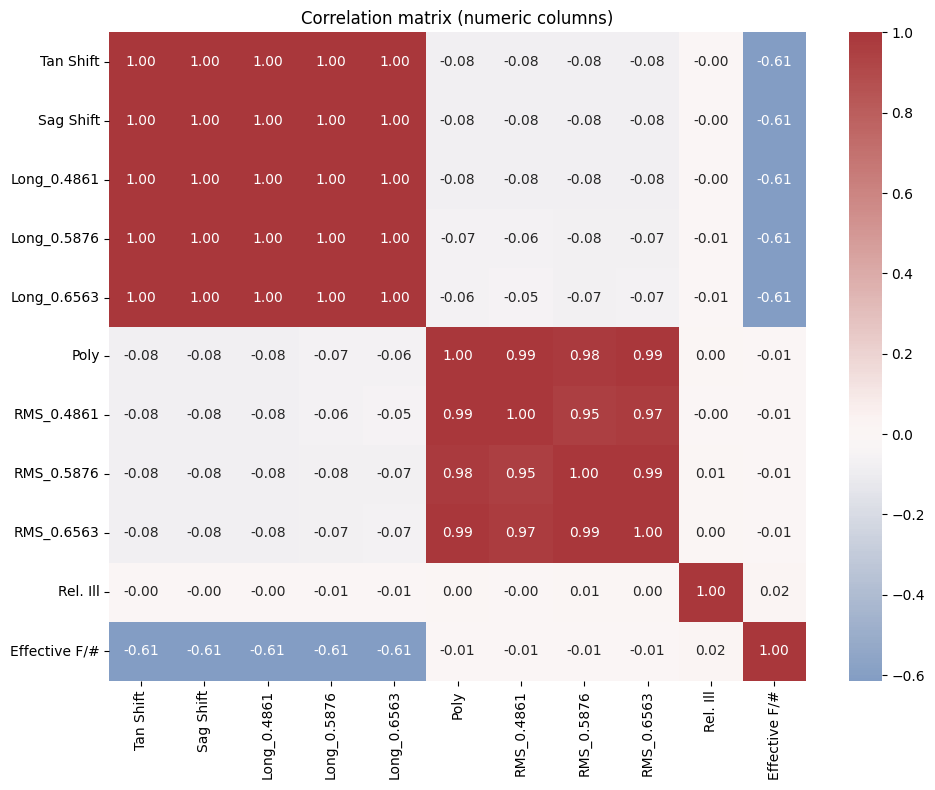

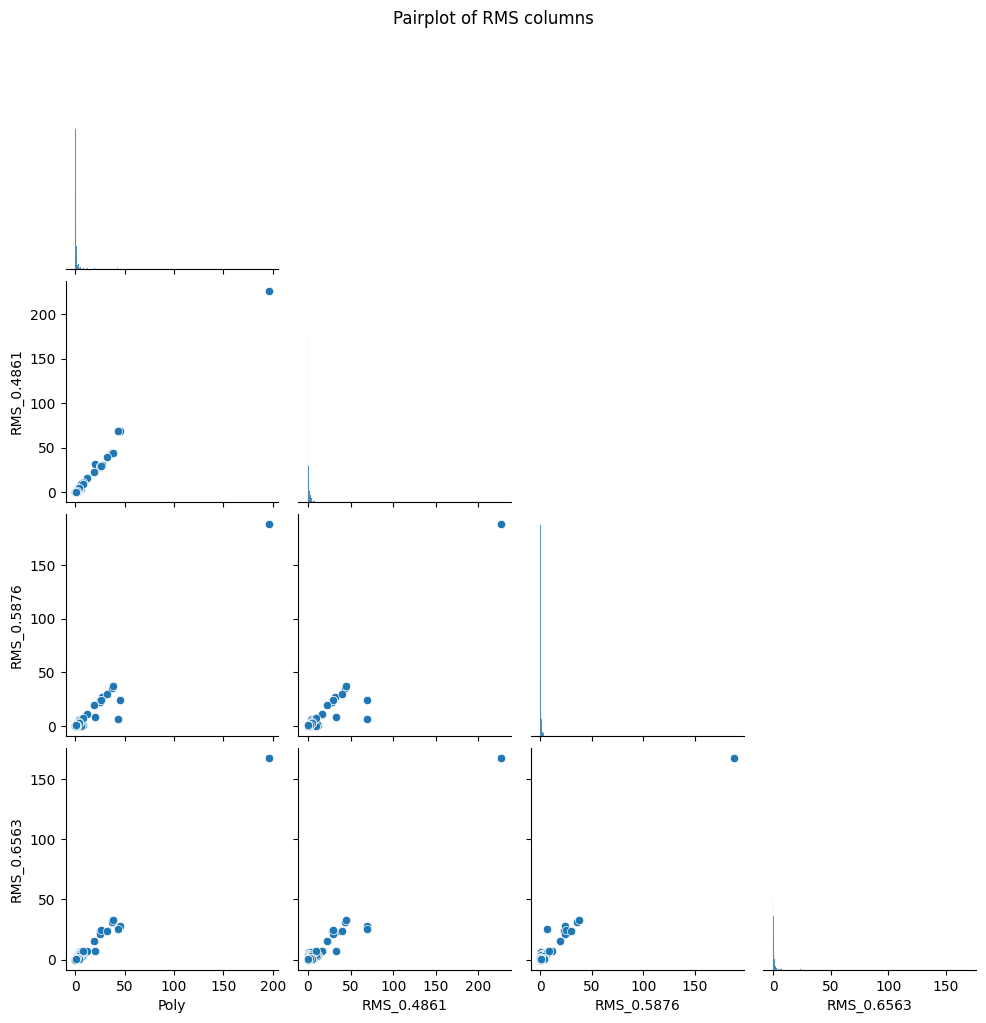

In [12]:
# ...existing code...
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Select numeric columns (including RMS columns) and drop rows with all-NaNs
numeric_df = summary_df.select_dtypes(include=[np.number]).copy()
numeric_df = numeric_df.dropna(how='all')
print(f"Numeric shape: {numeric_df.shape}")

# 1) Correlation heatmap
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title('Correlation matrix (numeric columns)')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150)
print('Saved: correlation_heatmap.png')

# 2) Pairplot for RMS columns (if they exist)
rms_cols = [c for c in ['Poly','RMS_0.4861','RMS_0.5876','RMS_0.6563'] if c in summary_df.columns]
if len(rms_cols) > 1:
    try:
        g = sns.pairplot(summary_df[rms_cols].dropna(), corner=True)
        g.fig.suptitle('Pairplot of RMS columns', y=1.02)
        g.savefig('rms_pairplot.png')
        print('Saved: rms_pairplot.png')
    except Exception as e:
        print('Pairplot failed:', e)
else:
    print('Not enough RMS columns for pairplot.')

Saved: rms_violin.png
Saved: rms_boxplot.png
Saved: rms_boxplot.png
Saved: rms_joint_hex.png
Saved: rms_joint_hex.png


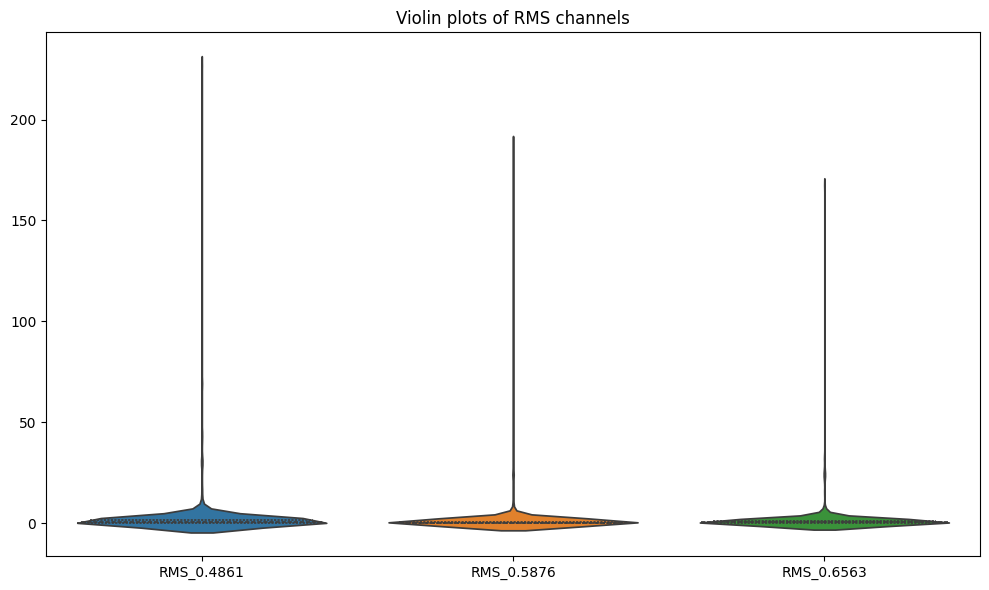

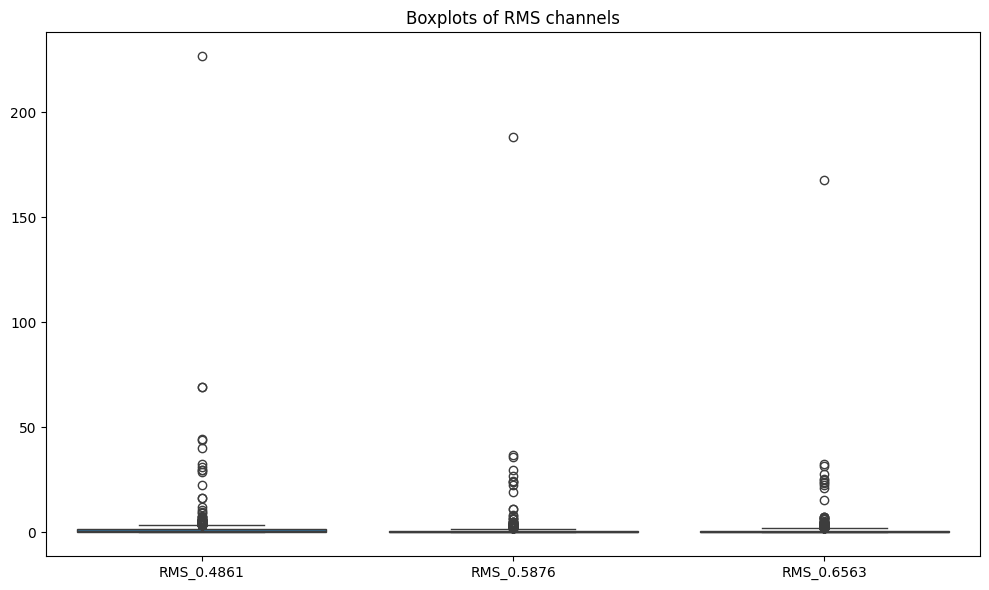

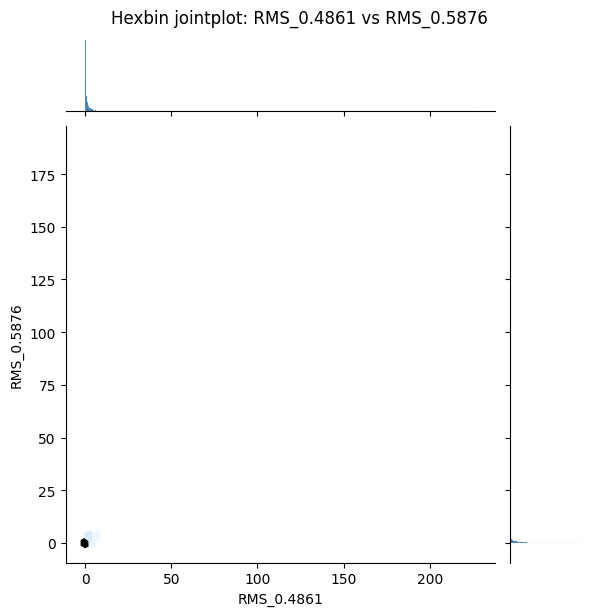

In [3]:
# Distribution plots: violin + boxplots + KDE
import matplotlib.pyplot as plt
import seaborn as sns

rms_cols = [c for c in ['RMS_0.4861','RMS_0.5876','RMS_0.6563'] if c in summary_df.columns]
if rms_cols:
    plt.figure(figsize=(10,6))
    sns.violinplot(data=summary_df[rms_cols].dropna(), inner='quartile')
    plt.title('Violin plots of RMS channels')
    plt.tight_layout()
    plt.savefig('rms_violin.png', dpi=150)
    print('Saved: rms_violin.png')

    plt.figure(figsize=(10,6))
    sns.boxplot(data=summary_df[rms_cols].dropna())
    plt.title('Boxplots of RMS channels')
    plt.tight_layout()
    plt.savefig('rms_boxplot.png', dpi=150)
    print('Saved: rms_boxplot.png')

    # Example jointplot for the first two RMS columns
    if len(rms_cols) >= 2:
        a, b = rms_cols[:2]
        sns.jointplot(x=a, y=b, data=summary_df, kind='hex')
        plt.suptitle(f'Hexbin jointplot: {a} vs {b}', y=1.02)
        plt.savefig('rms_joint_hex.png', dpi=150)
        print('Saved: rms_joint_hex.png')
else:
    print('No RMS columns found for distribution plots.')


/var/folders/zx/pzkprjzd0s32c35fwp_mstx00000gn/T/ipykernel_8527/804638638.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Saved: pca_scatter.png


/var/folders/zx/pzkprjzd0s32c35fwp_mstx00000gn/T/ipykernel_8527/804638638.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Saved: tsne_scatter.png
UMAP not available (skipping)
Saved: interactive_pca.html
Saved: interactive_rms_0_4861_hist.html


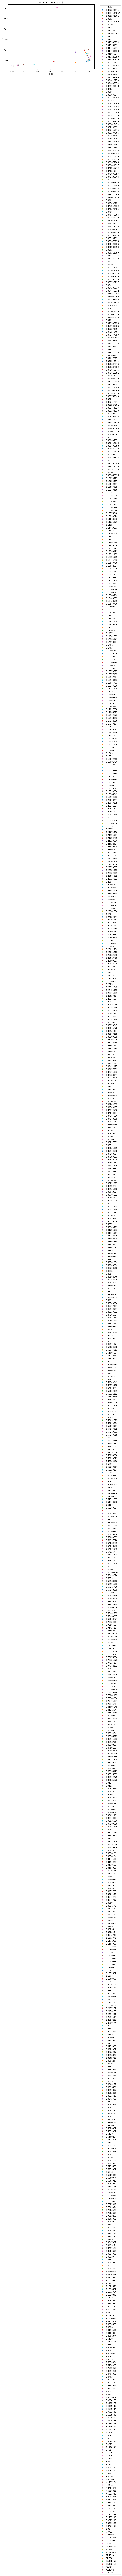

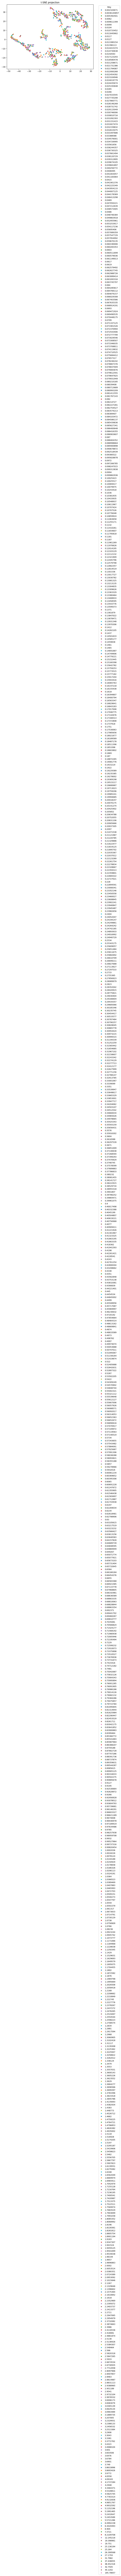

In [13]:
# Dimensionality reduction: PCA and t-SNE (and UMAP if installed)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Prepare data for DR: use numeric_df, drop rows with NaNs
dr_df = numeric_df.dropna()
X = dr_df.values
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xs)
plt.figure(figsize=(8,6))
if 'Poly' in summary_df.columns:
    # align indices: use dr_df.index to get corresponding Poly values
    poly_vals = summary_df.loc[dr_df.index, 'Poly']
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=poly_vals, palette='tab10', s=40)
    plt.legend(title='Poly', bbox_to_anchor=(1.05,1), loc='upper left')
else:
    plt.scatter(X_pca[:,0], X_pca[:,1], s=30)
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title('PCA (2 components)')
plt.tight_layout()
plt.savefig('pca_scatter.png', dpi=150)
print('Saved: pca_scatter.png')

# t-SNE (only if dataset not too large)
if Xs.shape[0] <= 2000:
    tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
    X_tsne = tsne.fit_transform(Xs)
    plt.figure(figsize=(8,6))
    if 'Poly' in summary_df.columns:
        sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=poly_vals, palette='tab10', s=30)
        plt.legend(title='Poly', bbox_to_anchor=(1.05,1), loc='upper left')
    else:
        plt.scatter(X_tsne[:,0], X_tsne[:,1], s=20)
    plt.title('t-SNE projection')
    plt.tight_layout()
    plt.savefig('tsne_scatter.png', dpi=150)
    print('Saved: tsne_scatter.png')
else:
    print('Skipping t-SNE: too many samples (>', Xs.shape[0], ')')

# Try UMAP if installed
try:
    import umap
    reducer = umap.UMAP(random_state=42)
    X_umap = reducer.fit_transform(Xs)
    plt.figure(figsize=(8,6))
    if 'Poly' in summary_df.columns:
        sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=poly_vals, palette='tab10', s=30)
        plt.legend(title='Poly', bbox_to_anchor=(1.05,1), loc='upper left')
    else:
        plt.scatter(X_umap[:,0], X_umap[:,1], s=20)
    plt.title('UMAP projection')
    plt.tight_layout()
    plt.savefig('umap_scatter.png', dpi=150)
    print('Saved: umap_scatter.png')
except Exception:
    print('UMAP not available (skipping)')

# Interactive Plotly plots (if plotly installed)
try:
    import plotly.express as px
    # interactive PCA
    df_pca = pd.DataFrame({'PC1': X_pca[:,0], 'PC2': X_pca[:,1]})
    if 'Poly' in summary_df.columns:
        df_pca['Poly'] = poly_vals.values
    fig = px.scatter(df_pca, x='PC1', y='PC2', color='Poly' if 'Poly' in df_pca.columns else None,
                     title='Interactive PCA')
    fig.write_html('interactive_pca.html')
    print('Saved: interactive_pca.html')

    # interactive histogram for a selected RMS column
    if 'RMS_0.4861' in summary_df.columns:
        fig2 = px.histogram(summary_df, x='RMS_0.4861', nbins=80, title='Interactive histogram RMS_0.4861')
        fig2.write_html('interactive_rms_0_4861_hist.html')
        print('Saved: interactive_rms_0_4861_hist.html')
except Exception:
    print('Plotly not available (skipping interactive plots)')
